In [1]:
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt
import os
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler

import mplscience
import muon
mplscience.available_styles()
mplscience.set_style(reset_current=True)
plt.rcParams['legend.scatterpoints'] = 1 

['default', 'despine']


In [2]:
mudata = muon.read("/lustre/groups/ml01/workspace/moscot_paper/pancreas_revision/mudata_with_annotation_all.h5mu")
adata = mudata["rna"]
adata.obsm["X_umap_gex"] = adata.obsm["X_umap"]
adata.obsm["X_umap"] = mudata.obsm["X_umap"]
adata.obsm["X_umap_atac"] = mudata["atac"].obsm["X_umap"]

/home/icb/dominik.klein/miniconda3/envs/jax_gpu3/lib/python3.8/site-packages/mudata/_core/mudata.py:569: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data_mod.loc[:, colname] = col
/home/icb/dominik.klein/miniconda3/envs/jax_gpu3/lib/python3.8/site-packages/mudata/_core/mudata.py:569: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data_mod.loc[:, colname] = col


In [23]:
adata.obs["cell_type_refined"] = mudata.obs["cell_type_refined"]

In [3]:
output_dir = "/lustre/groups/ml01/workspace/moscot_paper/pancreas_revision/plots/EDA"

In [4]:
adata.X = adata.layers["raw_counts"]
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)
sc.pp.pca(adata)

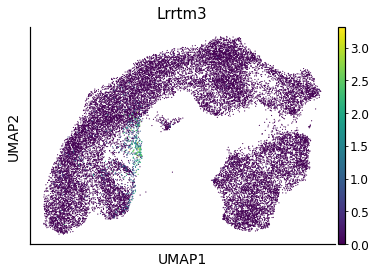

In [5]:
fig = sc.pl.umap(adata, color="Lrrtm3", return_fig=True)

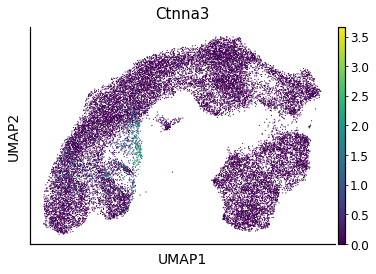

In [6]:
fig = sc.pl.umap(adata, color="Ctnna3", return_fig=True)

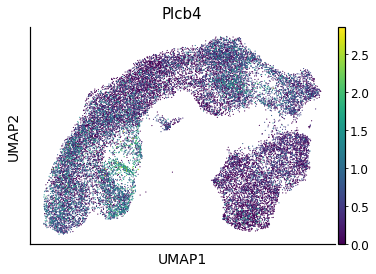

In [21]:
fig = sc.pl.umap(adata, color=["Plcb4"], return_fig=True)

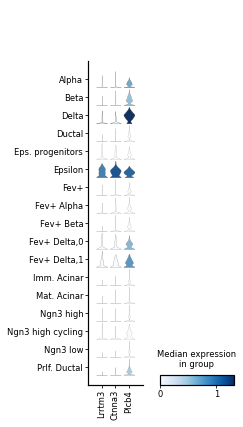

In [24]:
sc.pl.stacked_violin(adata, ["Lrrtm3", "Ctnna3", "Plcb4"], groupby="cell_type_refined")